In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


In [2]:
data=pd.read_csv("..\data\\card_credit_fraud_Classification project Final.csv_sans_guillemets.csv", sep=";", decimal=',')
dft=pd.get_dummies(data, columns=["type"], drop_first=False,dtype=int)
cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
dft[cols] = dft[cols].astype(float)
dft=dft.drop(["nameOrig","nameDest"], axis=1)
data=dft
# print(data.head())
# print(data.info())


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\propa\AppData\Local\Temp\ipykernel_2228\1604766278.py:1: SyntaxWarning: invalid escape sequence '\d'
  data=pd.read_csv("..\data\\card_credit_fraud_Classification project Final.csv_sans_guillemets.csv", sep=";", decimal=',')


In [ ]:
# data=pd.read_csv("..\data\\data_train_set.csv", sep=";", decimal=',')
# dft=pd.get_dummies(data, columns=["type"], drop_first=False,dtype=int)
# cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
# dft[cols] = dft[cols].astype(float)
# dft=dft.drop(["nameOrig","nameDest"], axis=1)
# data=dft
# print(data.info())
# print(data["isFraud"].value_counts())

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\propa\AppData\Local\Temp\ipykernel_6072\4182087624.py:1: SyntaxWarning: invalid escape sequence '\d'
  data=pd.read_csv("..\data\\data_train_set.csv", sep=";", decimal=',')


<class 'pandas.DataFrame'>
RangeIndex: 806570 entries, 0 to 806569
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transactionId   806570 non-null  int64  
 1   step            806570 non-null  int64  
 2   amount          806570 non-null  float64
 3   oldbalanceOrg   806570 non-null  float64
 4   newbalanceOrig  806570 non-null  float64
 5   oldbalanceDest  806570 non-null  float64
 6   newbalanceDest  806570 non-null  float64
 7   isFraud         806570 non-null  int64  
 8   type_CASH_IN    806570 non-null  int64  
 9   type_CASH_OUT   806570 non-null  int64  
 10  type_DEBIT      806570 non-null  int64  
 11  type_PAYMENT    806570 non-null  int64  
 12  type_TRANSFER   806570 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 80.0 MB
None
isFraud
0    799934
1      6636
Name: count, dtype: int64


In [ ]:
# data=pd.read_csv("..\data\\data_test_set.csv", sep=";", decimal=',')
# dft=pd.get_dummies(data, columns=["type"], drop_first=False,dtype=int)
# print(data.info())
# # data.describe()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\propa\AppData\Local\Temp\ipykernel_6072\412344070.py:1: SyntaxWarning: invalid escape sequence '\d'
  data=pd.read_csv("..\data\\data_test_set.csv", sep=";", decimal=',')


<class 'pandas.DataFrame'>
RangeIndex: 201643 entries, 0 to 201642
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   transactionId   201643 non-null  int64
 1   step            201643 non-null  int64
 2   type            201643 non-null  str  
 3   amount          201643 non-null  str  
 4   nameOrig        201643 non-null  str  
 5   oldbalanceOrg   201643 non-null  str  
 6   newbalanceOrig  201643 non-null  str  
 7   nameDest        201643 non-null  str  
 8   oldbalanceDest  201643 non-null  str  
 9   newbalanceDest  201643 non-null  str  
 10  isFraud         201643 non-null  int64
dtypes: int64(3), str(8)
memory usage: 16.9 MB
None


# choix des hyperparam

# randomforest

In [39]:
x=data.drop("isFraud", axis=1)
y=data["isFraud"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 10,15],
    'min_samples_split': [2, 5,8],
    'min_samples_leaf': [1, 2,5]
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_jobs=-1, verbose=2, n_iter=10, scoring='recall')
rand_search.fit(x_train, y_train)

print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\victorien.sauvonnet\Documents\projet-de-classification-isFraud\Projet classification\fraudenv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Score: 0.9736087149607782


In [40]:
rforest_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=None)

# xgboost

In [30]:
x=data.drop("isFraud", axis=1)
y=data["isFraud"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = XGBClassifier()
param_grid = {
    'gamma': [0, 0.1,0.01],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
    
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_jobs=-1, verbose=2, n_iter=10, scoring='recall')
rand_search.fit(x_train, y_train)

print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.01, 'colsample_bytree': 0.8}
Best Score: 0.9782836127875636


In [5]:
xgboost_model = XGBClassifier(subsample=0.8, n_estimators=200, max_depth=6, learning_rate=0.1, colsample_bytree=0.8,eval_metric='logloss')

# knn

In [ ]:
x=data.drop("isFraud", axis=1)
y=data["isFraud"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree'],
    'leaf_size': [10, 20, 30]
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_jobs=-1, verbose=2, n_iter=10, scoring='recall')
rand_search.fit(x_train, y_train)

print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 20, 'algorithm': 'auto'}
Best Score: 0.9391303319119823


In [5]:
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=3, leaf_size=20, algorithm='auto')

# **metrics avec hyperparametre recup**

# xgboost

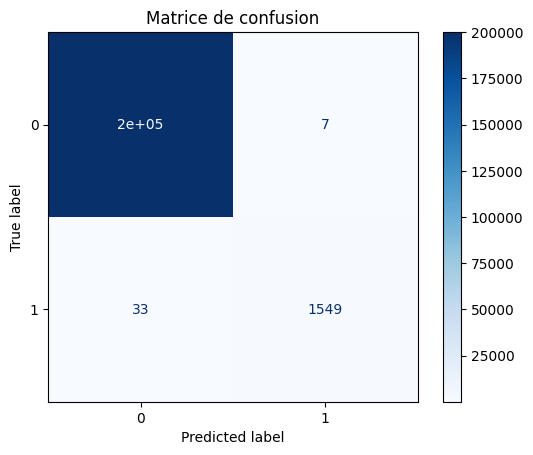

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       1.00      0.98      0.99      1582

    accuracy                           1.00    201643
   macro avg       1.00      0.99      0.99    201643
weighted avg       1.00      1.00      1.00    201643



In [9]:
x=data.drop("isFraud", axis=1)
y=data["isFraud"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = xgboost_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))

# randomforest

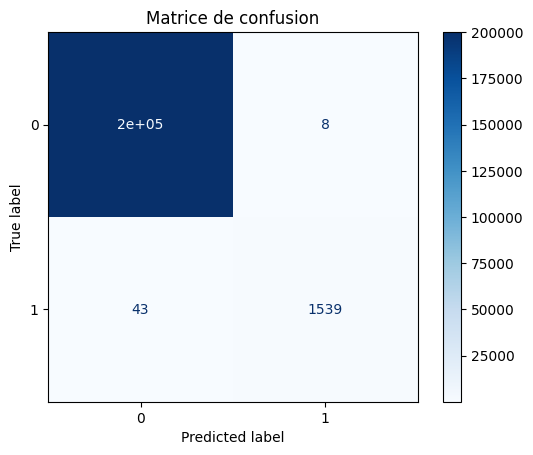

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.99      0.97      0.98      1582

    accuracy                           1.00    201643
   macro avg       1.00      0.99      0.99    201643
weighted avg       1.00      1.00      1.00    201643



In [26]:
x=data.drop("isFraud", axis=1)
y=data["isFraud"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = rforest_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))

# knn

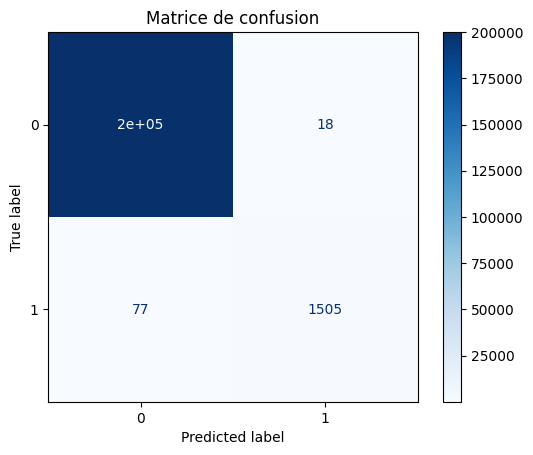

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.99      0.95      0.97      1582

    accuracy                           1.00    201643
   macro avg       0.99      0.98      0.98    201643
weighted avg       1.00      1.00      1.00    201643



In [10]:
x=data.drop("isFraud", axis=1)
y=data["isFraud"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = knn_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))

# **test avec replacement des feature new et old par une balance**

In [11]:
data_mod=data.copy()
data_mod["balance_orig"]=data_mod["oldbalanceOrg"]-data_mod["newbalanceOrig"]
data_mod["balance_dest"]=data_mod["oldbalanceDest"]-data_mod["newbalanceDest"]
data_mod.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"], axis=1, inplace=True)
data_mod.head()

,transactionId,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balance_orig,balance_dest
0,0,1,9839.64,0,0,0,0,1,0,9839.64,0.0
1,1,1,1864.28,0,0,0,0,1,0,1864.28,0.0
2,2,1,181.00,1,0,0,0,0,1,181.00,0.0
3,3,1,181.00,1,0,1,0,0,0,181.00,21182.0
4,4,1,11668.14,0,0,0,0,1,0,11668.14,0.0


# xgboost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.99      0.97      0.98      1582

    accuracy                           1.00    201643
   macro avg       1.00      0.99      0.99    201643
weighted avg       1.00      1.00      1.00    201643



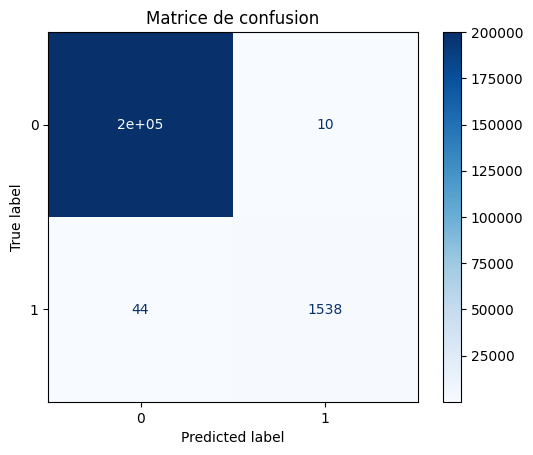

In [12]:
x,y=data_mod.drop("isFraud", axis=1), data_mod["isFraud"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = xgboost_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
print(classification_report(y_val, y_pred))

# randomforest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       1.00      0.97      0.98      1582

    accuracy                           1.00    201643
   macro avg       1.00      0.99      0.99    201643
weighted avg       1.00      1.00      1.00    201643



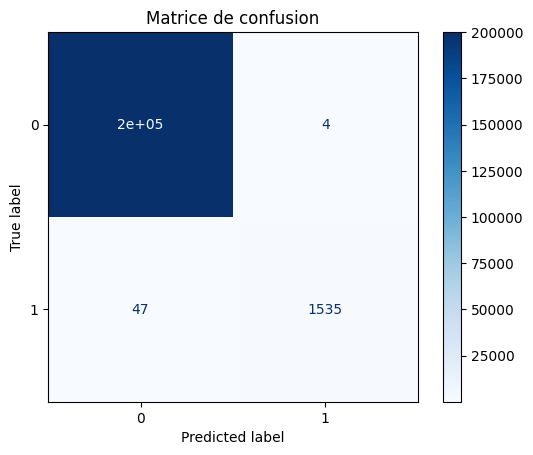

In [27]:
x,y=data_mod.drop("isFraud", axis=1), data_mod["isFraud"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = rforest_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
print(classification_report(y_val, y_pred))

# knn

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.98      0.96      0.97      1582

    accuracy                           1.00    201643
   macro avg       0.99      0.98      0.98    201643
weighted avg       1.00      1.00      1.00    201643



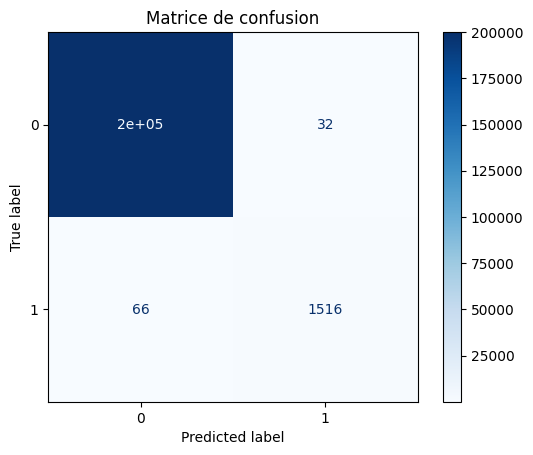

In [13]:
x,y=data_mod.drop("isFraud", axis=1), data_mod["isFraud"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = knn_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
print(classification_report(y_val, y_pred))

# **test avec uniquement cashout et transfert**

# xgboost test

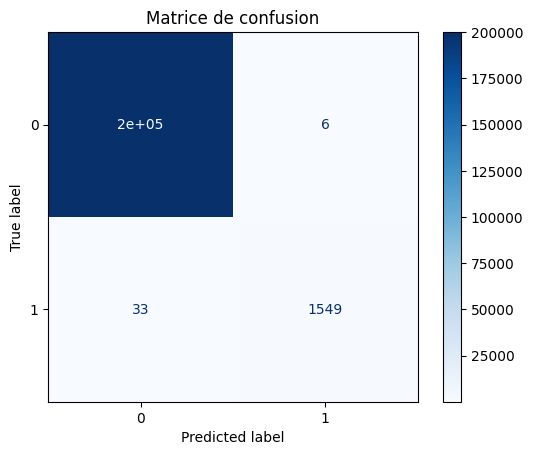

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       1.00      0.98      0.99      1582

    accuracy                           1.00    201643
   macro avg       1.00      0.99      0.99    201643
weighted avg       1.00      1.00      1.00    201643

<class 'pandas.DataFrame'>
RangeIndex: 1008213 entries, 0 to 1008212
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   transactionId   1008213 non-null  int64  
 1   step            1008213 non-null  int64  
 2   amount          1008213 non-null  float64
 3   oldbalanceOrg   1008213 non-null  float64
 4   newbalanceOrig  1008213 non-null  float64
 5   oldbalanceDest  1008213 non-null  float64
 6   newbalanceDest  1008213 non-null  float64
 7   isFraud         1008213 non-null  int64  
 8   type_CASH_OUT   1008213 non-null  int64  
 9   type_TRANSFER   1008213 non-null  int64  
dtypes:

In [6]:
data_mod2=data.copy()
data_mod2.drop(["type_DEBIT","type_PAYMENT","type_CASH_IN"], axis=1, inplace=True)
x,y=data_mod2.drop("isFraud", axis=1), data_mod2["isFraud"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = xgboost_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))
print(data_mod2.info())

# randomfosrest test

In [9]:
data_mod2=data.copy()
data_mod2.drop(["type_DEBIT","type_PAYMENT","type_CASH_IN"], axis=1, inplace=True)
x,y=data_mod2.drop("isFraud", axis=1), data_mod2["isFraud"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = rforest_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))

KeyboardInterrupt: 

# knn

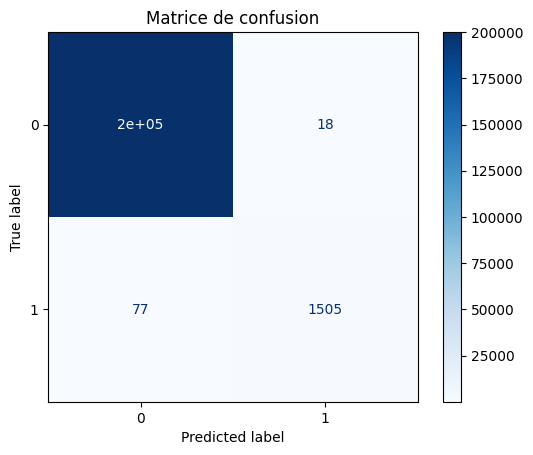

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.99      0.95      0.97      1582

    accuracy                           1.00    201643
   macro avg       0.99      0.98      0.98    201643
weighted avg       1.00      1.00      1.00    201643



In [15]:
data_mod2=data.copy()
data_mod2.drop(["type_DEBIT","type_PAYMENT","type_CASH_IN"], axis=1, inplace=True)
x,y=data_mod2.drop("isFraud", axis=1), data_mod2["isFraud"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = knn_model
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))

# **test smote**

In [10]:



x,y=data_mod2.drop("isFraud", axis=1), data["isFraud"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy=0.5, random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(y_train.value_counts())
print(y_train_smote.value_counts())

isFraud
0    799939
1      6631
Name: count, dtype: int64
isFraud
0    799939
1    399969
Name: count, dtype: int64


# xgboost

In [ ]:

model = XGBClassifier()
param_grid = {
    'gamma': [0, 0.1,0.01],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
    
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_jobs=-1, verbose=2, n_iter=10, scoring='recall')
rand_search.fit(x_train_smote, y_train_smote)

print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.6, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Score: 0.9987724048613768


In [ ]:
best_xgboost=rand_search.best_estimator_

In [7]:
from xgboost.callback import EarlyStopping

In [8]:
import xgboost as xgb


Meilleure itération : 73
Meilleur score : 0.00599612525311643


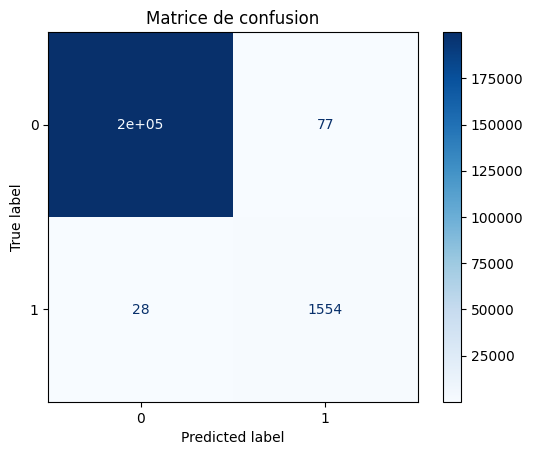

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.95      0.98      0.97      1582

    accuracy                           1.00    201643
   macro avg       0.98      0.99      0.98    201643
weighted avg       1.00      1.00      1.00    201643



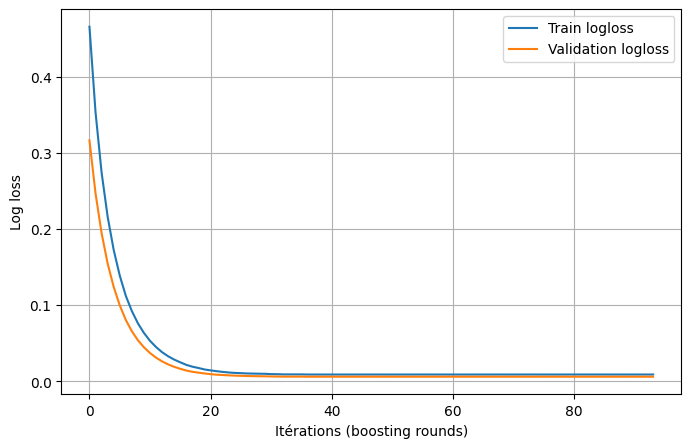

In [11]:
dtrain = xgb.DMatrix(x_train_smote, label=y_train_smote)
dval = xgb.DMatrix(x_val, label=y_val)

# Paramètres du modèle
#subsample=0.8, n_estimators=200, max_depth=6, learning_rate=0.1, colsample_bytree=0.8,eval_metric='logloss'

params = {
    'subsample': 0.6, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8, 'eval_metric':'logloss'
}

# Liste des jeux de validation
evallist = [(dtrain, 'train'), (dval, 'validation')]
results = {}
# Entraînement avec early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evallist,
    early_stopping_rounds=20,
    evals_result=results,
    verbose_eval=False
)

print("Meilleure itération :", bst.best_iteration)
print("Meilleur score :", bst.best_score)

# Prédictions sur la validation
y_pred = (bst.predict(dval) > 0.5).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# Rapport classification
print(classification_report(y_val, y_pred))

# Tracer la logloss par itérations

train_loss = results['train']['logloss']
val_loss = results['validation']['logloss']

plt.figure(figsize=(8,5))
plt.plot(train_loss, label='Train logloss')
plt.plot(val_loss, label='Validation logloss')
plt.xlabel('Itérations (boosting rounds)')
plt.ylabel('Log loss')
plt.legend()
plt.grid()
plt.show()

In [18]:
model = xgboost_model
model = xgboost_model
modelf=model.fit(x_train_smote, y_train_smote,eval_set=[(x_val, y_val)],early_stopping_rounds=20)

results = model.evals_result()

print("Meilleure itération :", model.best_iteration)
print("Meilleur score :", model.best_score)

train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train logloss')
plt.plot(val_loss, label='Validation logloss')
plt.xlabel('Itérations (boosting rounds)')
plt.ylabel('Log loss')
plt.legend()
plt.grid()
plt.show()

y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
x,y=data_mod2.drop("isFraud", axis=1), data["isFraud"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
rus = RandomUnderSampler(
    sampling_strategy=0.5,
    random_state=42
)

X_train_under, y_train_under = rus.fit_resample(x_train, y_train)
print(y_train.value_counts())
print(y_train_under.value_counts())

isFraud
0    799939
1      6631
Name: count, dtype: int64
isFraud
0    13262
1     6631
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import learning_curve

Meilleure itération : 77
Meilleur score : 0.01167043658659758


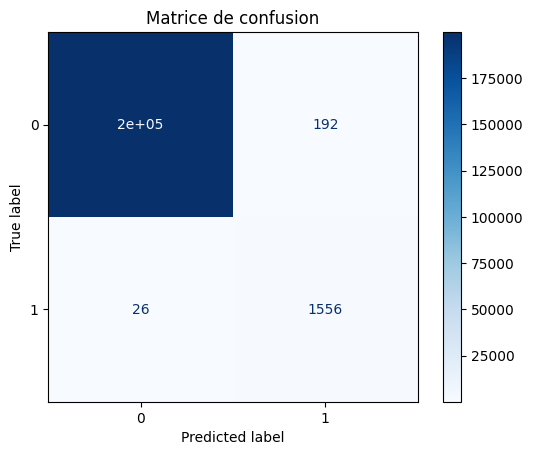

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.89      0.98      0.93      1582

    accuracy                           1.00    201643
   macro avg       0.95      0.99      0.97    201643
weighted avg       1.00      1.00      1.00    201643



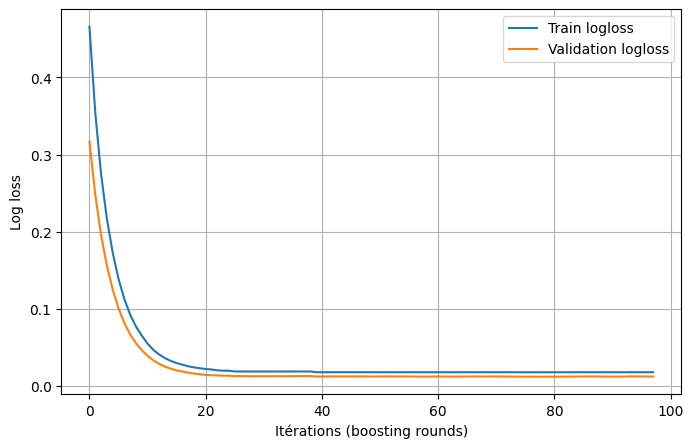

In [38]:
dtrain = xgb.DMatrix(X_train_under, label=y_train_under)
dval = xgb.DMatrix(x_val, label=y_val)

# Paramètres du modèle
#subsample=0.8, n_estimators=200, max_depth=6, learning_rate=0.1, colsample_bytree=0.8,eval_metric='logloss'

params = {
    'subsample': 0.6, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8, 'eval_metric':'logloss'
}

# Liste des jeux de validation
evallist = [(dtrain, 'train'), (dval, 'validation')]
results = {}
# Entraînement avec early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evallist,
    early_stopping_rounds=20,
    evals_result=results,
    verbose_eval=False
)

print("Meilleure itération :", bst.best_iteration)
print("Meilleur score :", bst.best_score)

# Prédictions sur la validation
y_pred = (bst.predict(dval) > 0.5).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# Rapport classification
print(classification_report(y_val, y_pred))

# Tracer la logloss par itérations

train_loss = results['train']['logloss']
val_loss = results['validation']['logloss']

plt.figure(figsize=(8,5))
plt.plot(train_loss, label='Train logloss')
plt.plot(val_loss, label='Validation logloss')
plt.xlabel('Itérations (boosting rounds)')
plt.ylabel('Log loss')
plt.legend()
plt.grid()
plt.show()

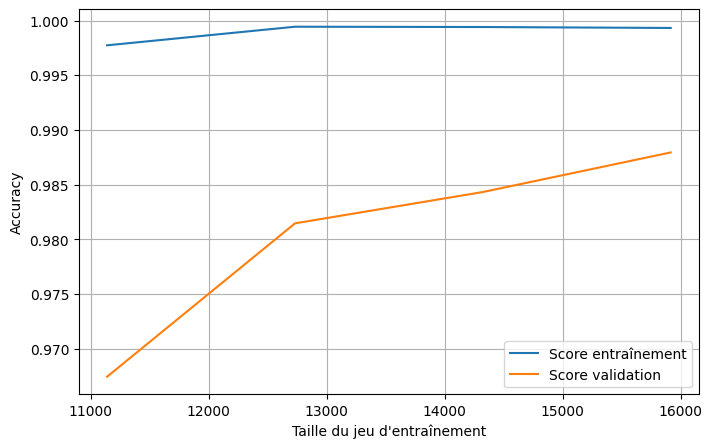

In [12]:
model = xgboost_model

# Courbe d'apprentissage
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train_under,
    y=y_train_under,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='recall',
    n_jobs=-1
)

# Moyenne et écart-type
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Score entraînement")
plt.plot(train_sizes, val_mean, label="Score validation")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model = xgboost_model
modelf=model.fit(X_train_under, y_train_under)
best_iter = model.best_iteration
print("Meilleure itération :", best_iter)
results = modelf.evals_result()
train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train logloss')
plt.plot(val_loss, label='Validation logloss')
plt.xlabel('Itérations (boosting rounds)')
plt.ylabel('Log loss')
plt.legend()
plt.grid()
plt.show()

y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

# random forest

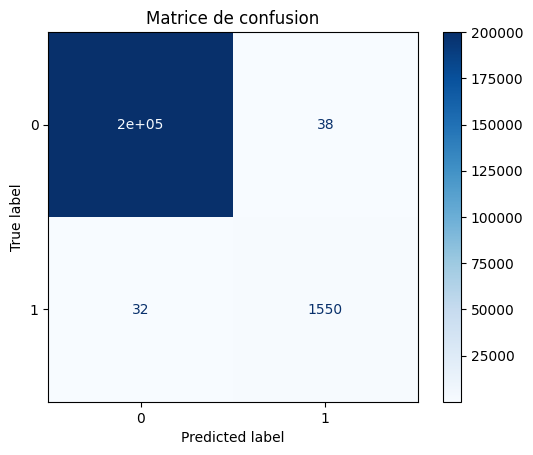

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.98      0.98      0.98      1582

    accuracy                           1.00    201643
   macro avg       0.99      0.99      0.99    201643
weighted avg       1.00      1.00      1.00    201643



In [29]:
model = rforest_model
model.fit(x_train_smote, y_train_smote)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))

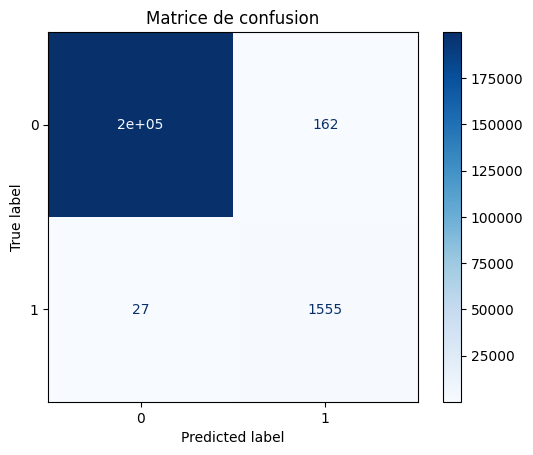

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200061
           1       0.91      0.98      0.94      1582

    accuracy                           1.00    201643
   macro avg       0.95      0.99      0.97    201643
weighted avg       1.00      1.00      1.00    201643



In [31]:
model = rforest_model
model.fit(X_train_under, y_train_under)
y_pred = model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_val, y_pred))